<a href="https://colab.research.google.com/github/PeterSBerman/An-exploration-of-crime-data/blob/main/an_exploration_of_crime_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An exploration of crime data

the goal of this project is to analyze nypd arrest data

tasks:

▪ pick any zip code/neighborhood/district in this dataset as an initial
comparison point
▪ pick a feature/measure/column
▪ compare above entity to any other (different) entity - you only need
to do one additional comparison point (but you’re welcome to do
more comparisons if you feel compelled to do so)
▪ the analysis should include some descriptive statistics
▪ the analysis should include one cleaning task (or more)
▪ the analysis should include one visualization (or more)
▪ additional task added during class, show a disparity

In [3]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Main site: https://opendata.cityofnewyork.us/

data location: https://data.cityofnewyork.us/Public-Safety/NYPD-Arrest-Data-Year-to-Date-/uip8-fykc

NYPD Arrest Data (Year to Date)

Updated
April 27, 2023

Data Provided by
Police Department (NYPD)

This is a breakdown of every arrest effected in NYC by the NYPD during the current year. This data is manually extracted every quarter and reviewed by the Office of Management Analysis and Planning. Each record represents an arrest effected in NYC by the NYPD and includes information about the type of crime, the location and time of enforcement. In addition, information related to suspect demographics is also included. This data can be used by the public to explore the nature of police enforcement activity.




In [4]:
#define dataframe(df) as data
#had to export csv file to github repository then attain link to data by clicking view raw data and copying address bar
df = pd.read_csv('https://raw.githubusercontent.com/PeterSBerman/An-exploration-of-crime-data/main/NYPD_Arrest_Data__Year_to_Date_.csv')


In [5]:
#get a feel for the table structure and data
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,263187871,02/07/2023,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,S,120,0,25-44,M,BLACK,951637,171141,40.636362,-74.117505,POINT (-74.117505 40.636362)
1,261368273,01/04/2023,NaN,(null),NaN,(null),RPA0076801,M,M,34,0,25-44,F,BLACK,1004287,251338,40.856519,-73.927564,POINT (-73.927564 40.856519)
2,261667175,01/10/2023,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,42,0,18-24,F,WHITE HISPANIC,1008754,238895,40.822355,-73.911463,POINT (-73.911463 40.822355)
3,264298625,02/27/2023,NaN,(null),NaN,(null),PL 2224000,F,Q,113,0,25-44,M,BLACK,1039225,181937,40.665881,-73.801837,POINT (-73.80183654 40.66588105)
4,261516485,01/07/2023,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,M,18,0,<18,M,BLACK,988210,218129,40.765390,-73.985702,POINT (-73.985702 40.76539)


In [6]:
# breakdown by Borough: B(Bronx), S(Staten Island), K(Brooklyn), M(Manhattan), Q(Queens)
df.groupby('ARREST_BORO').describe()

ARREST_KEY                                                         \
                 count          mean           std          min           25%   
ARREST_BORO                                                                     
B              12856.0  2.635726e+08  1.390627e+06  261181534.0  2.623621e+08   
K              15208.0  2.635972e+08  1.397568e+06  261180920.0  2.623747e+08   
M              12559.0  2.635502e+08  1.400645e+06  261181251.0  2.622947e+08   
Q              11628.0  2.636100e+08  1.415676e+06  261180925.0  2.623622e+08   
S               2325.0  2.635648e+08  1.419720e+06  261181548.0  2.622946e+08   

                                                       PD_CD              ...  \
                     50%           75%          max    count        mean  ...   
ARREST_BORO                                                               ...   
B            263552674.5  2.647218e+08  265989695.0  12827.0  417.965074  ...   
K            263604460.5  2.647816e+08  266002261.0  15187.0  450.105748  ...   
M            263536627.0  2.647072e+08  265993648.0  12542.0  398.533487  ...   
Q            263664582.5  2.647972e+08  266004089.0  11444.0  444.321304  ...   
S            263589220.0  2.647786e+08  265993658.0   2325.0  474.998710  ...   

              Latitude            Longitude                                  \
                   75%        max     count       mean       std        min   
ARREST_BORO                                                                   
B            40.858093  40.912714   12856.0 -73.891019  0.027569 -73.931886   
K            40.684454  40.736931   15208.0 -73.946921  0.038830 -74.039874   
M            40.804711  40.872526   12559.0 -73.965112  0.660547 -74.015669   
Q            40.750286  40.799867   11628.0 -73.830821  0.055175 -73.958616   
S            40.639083  40.648266    2325.0 -74.121352  0.049973 -74.251844   

                                                         
                   25%        50%        75%        max  
ARREST_BORO                                              
B           -73.912901 -73.897447 -73.870168 -73.783854  
K           -73.977750 -73.946814 -73.917495 -73.857266  
M           -73.991932 -73.978392 -73.945898   0.000000  
Q           -73.871197 -73.827448 -73.791994 -73.701605  
S           -74.149238 -74.106113 -74.077263 -74.057614  

[5 rows x 72 columns]

Brooklyn had the highest # of arrests within this dataset, followed by Bronx, Manahattan, Queens, and Staten Island.

In [7]:
#create a new dataframe with only selected columns
df2 = df[['ARREST_KEY', 'ARREST_BORO', 'PERP_RACE']]

In [8]:
#rename columns for easier view
df2 = df2.rename(columns={'ARREST_KEY':'Key', 'ARREST_BORO': 'Borough of arrest', 'PERP_RACE' : 'Perpetrator’s race'})

In [49]:
#lets remove the UNKNOWN data under race and save that to a new dataframe
df3 = df2[(df2['Perpetrator’s race']!='UNKNOWN')] 

In [48]:
#pivot 
p_table2 = pd.pivot_table(df3, index = ['Perpetrator’s race'], columns = ['Borough of arrest'], aggfunc = 'count', margins=True)
print(p_table2)

                                  Key                                  
Borough of arrest                   B      K      M      Q     S    All
Perpetrator’s race                                                     
AMERICAN INDIAN/ALASKAN NATIVE     26     45     43     66     9    189
ASIAN / PACIFIC ISLANDER          181    640    406   1573    95   2895
BLACK                            6067   8993   6027   4608   972  26667
BLACK HISPANIC                   2246    761   1301    631   116   5055
WHITE                             424   1812   1457   1128   643   5464
WHITE HISPANIC                   3812   2824   3203   3523   464  13826
All                             12756  15075  12437  11529  2299  54096


In [50]:
# % of total
p_table2.div(p_table2.iloc[:,-1], axis=0 )

Key                                \
Borough of arrest                      B         K         M         Q   
Perpetrator’s race                                                       
AMERICAN INDIAN/ALASKAN NATIVE  0.137566  0.238095  0.227513  0.349206   
ASIAN / PACIFIC ISLANDER        0.062522  0.221071  0.140242  0.543351   
BLACK                           0.227510  0.337233  0.226010  0.172798   
BLACK HISPANIC                  0.444313  0.150544  0.257369  0.124827   
WHITE                           0.077599  0.331625  0.266654  0.206442   
WHITE HISPANIC                  0.275712  0.204253  0.231665  0.254810   
All                             0.235803  0.278671  0.229906  0.213121   

                                               
Borough of arrest                      S  All  
Perpetrator’s race                             
AMERICAN INDIAN/ALASKAN NATIVE  0.047619  1.0  
ASIAN / PACIFIC ISLANDER        0.032815  1.0  
BLACK                           0.036450  1.0  
BLACK HISPANIC                  0.022948  1.0  
WHITE                           0.117679  1.0  
WHITE HISPANIC                  0.033560  1.0  
All                             0.042499  1.0

In [51]:
#rounding up makes the data more consumable 
np2=np.round(p_table2.div(p_table2.iloc[:,-1], axis=0 ),2)
print(np2)

                                 Key                             
Borough of arrest                  B     K     M     Q     S  All
Perpetrator’s race                                               
AMERICAN INDIAN/ALASKAN NATIVE  0.14  0.24  0.23  0.35  0.05  1.0
ASIAN / PACIFIC ISLANDER        0.06  0.22  0.14  0.54  0.03  1.0
BLACK                           0.23  0.34  0.23  0.17  0.04  1.0
BLACK HISPANIC                  0.44  0.15  0.26  0.12  0.02  1.0
WHITE                           0.08  0.33  0.27  0.21  0.12  1.0
WHITE HISPANIC                  0.28  0.20  0.23  0.25  0.03  1.0
All                             0.24  0.28  0.23  0.21  0.04  1.0


In [60]:
#drop All row
pivot = np2.drop('All')
print(pivot)

                                 Key                             
Borough of arrest                  B     K     M     Q     S  All
Perpetrator’s race                                               
AMERICAN INDIAN/ALASKAN NATIVE  0.14  0.24  0.23  0.35  0.05  1.0
ASIAN / PACIFIC ISLANDER        0.06  0.22  0.14  0.54  0.03  1.0
BLACK                           0.23  0.34  0.23  0.17  0.04  1.0
BLACK HISPANIC                  0.44  0.15  0.26  0.12  0.02  1.0
WHITE                           0.08  0.33  0.27  0.21  0.12  1.0
WHITE HISPANIC                  0.28  0.20  0.23  0.25  0.03  1.0


In [63]:
#drop All column
df4 = pivot.iloc[: , :-1]
print(df4)

                                 Key                        
Borough of arrest                  B     K     M     Q     S
Perpetrator’s race                                          
AMERICAN INDIAN/ALASKAN NATIVE  0.14  0.24  0.23  0.35  0.05
ASIAN / PACIFIC ISLANDER        0.06  0.22  0.14  0.54  0.03
BLACK                           0.23  0.34  0.23  0.17  0.04
BLACK HISPANIC                  0.44  0.15  0.26  0.12  0.02
WHITE                           0.08  0.33  0.27  0.21  0.12
WHITE HISPANIC                  0.28  0.20  0.23  0.25  0.03


<Axes: ylabel='Perpetrator’s race'>

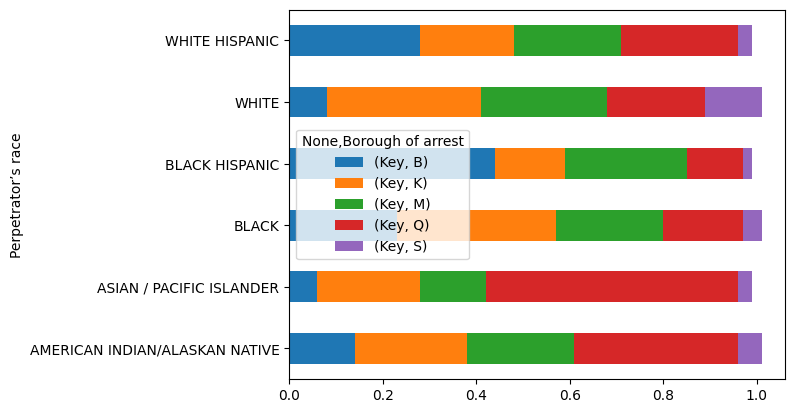

In [66]:
#Visualize data in a bar graph
df4.plot(kind='barh', stacked=True)

Based on the above bar graph which displays not the count, but % of total of arrests by race / Borough, we can conclude the following:
1. Queens has the highest % of Asian / Pacific Islander and American Indians arrests
2. Bronx had the highest % of arrests
3. Brooklyn had the highest % of Blacks arrests
4. Manhattan had the highest % of White arrests
5. Staten Island had the highest % of White arrests

Axes(0.125,0.11;0.775x0.77)


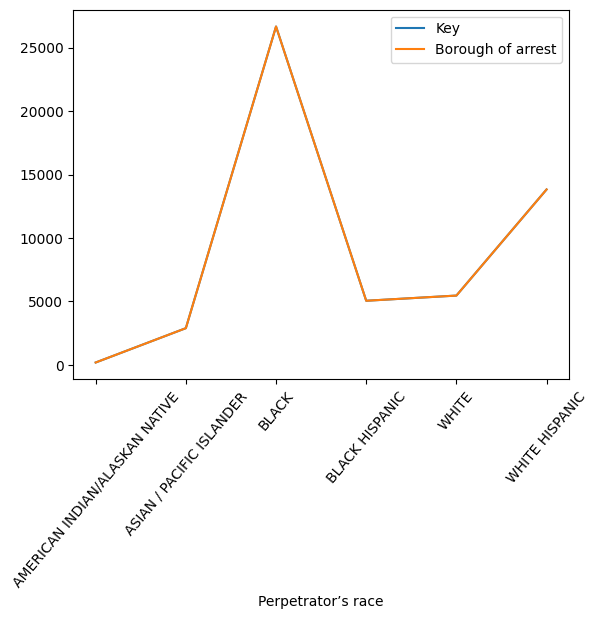

In [118]:
#Race disparity
df5 = df3.groupby('Perpetrator’s race').count()
print(df5.plot(kind='line',rot=50))

From a racial disparity point of view, it is clear just by a count of arrests per race, that there is a larger number of blacks being arrested than any other race within this dataset.